In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np

In [63]:
df=pd.read_csv(r"C:\Users\Usuario\Documents\data_set\afluenciastc_simple_02_2024.csv").rename(columns={"anio":"Año"})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008735 entries, 0 to 1008734
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   fecha      1008735 non-null  object
 1   Año        1008735 non-null  int64 
 2   mes        1002690 non-null  object
 3   linea      1008735 non-null  object
 4   estacion   1008735 non-null  object
 5   afluencia  1008735 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 46.2+ MB


In [65]:
### En la cdmx existe un dicho que los martes son los peores dias del metro en cuestion de alfuencia 
### 

In [66]:
#### Algo interesante seria comparar como disminuyo la alfuencia de personas en la pandemia de 2020-2022

In [67]:
from unidecode import unidecode

df['estacion'] = df['estacion'].apply(lambda x: unidecode(x))

df['estacion'] = df['estacion'].astype(str).str.upper()

df["linea"]=df["linea"].apply(lambda x: unidecode(x))

df["Dia_semana"]=pd.to_datetime( df['fecha']).apply(lambda x: x.strftime('%A'))

In [68]:
df.index=pd.to_datetime(df["fecha"])


#### Podemos notar que si hubo una disminucion muy notoria en la pandemia 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8948\3293241779.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



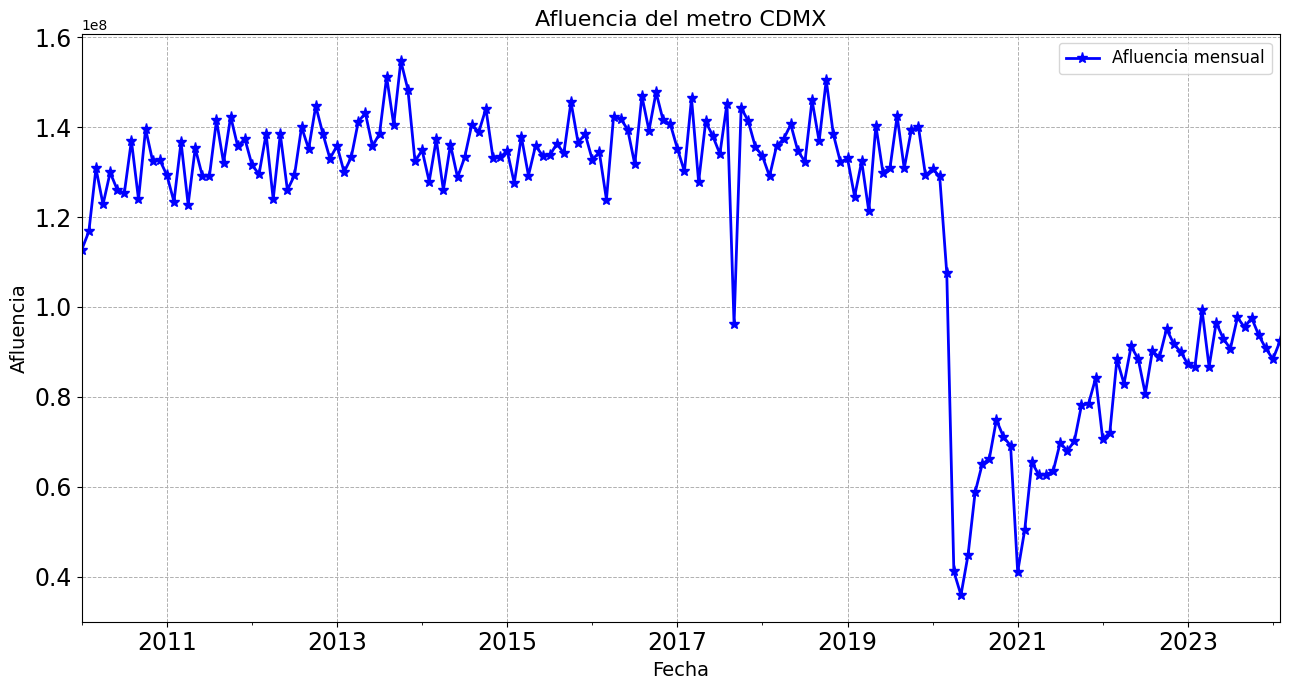

In [69]:
afluencia_mensual = df["afluencia"].resample("M").sum()
plt.figure(figsize=(13, 7))
afluencia_mensual.plot(color='b', linestyle='-', marker='*', markersize=8, linewidth=2)
plt.title("Afluencia del metro CDMX", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Afluencia", fontsize=14)
plt.yticks(size=17)
plt.xticks(size=17)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(['Afluencia mensual'], loc='best', fontsize=12)
plt.tight_layout()
plt.show()


### Vale la pena separar la afluencia mensual por linea

In [70]:
lineas_mensual=df.groupby('linea').resample('ME')['afluencia'].sum().reset_index()
lineas_mensual.index=lineas_mensual["fecha"]

In [71]:
import plotly.graph_objs as go
import plotly.express as px


fig = px.line(lineas_mensual, x=lineas_mensual.index, y='afluencia', color='linea',
              title='Afluencia Mensual por Línea del Metro')

fig.update_layout(xaxis_title='Fecha',
                  yaxis_title='Afluencia',
                  legend_title='Línea',
                  hovermode='x unified') 

fig.show()


In [119]:
semanal=df[df["Año"]>2021].groupby('Dia_semana').resample('D')['afluencia'].sum().reset_index()
semanal_prom=semanal.groupby(['Dia_semana']).agg({'afluencia': 'mean'}).reset_index().sort_values(by="Dia_semana", ascending=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8948\107277574.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




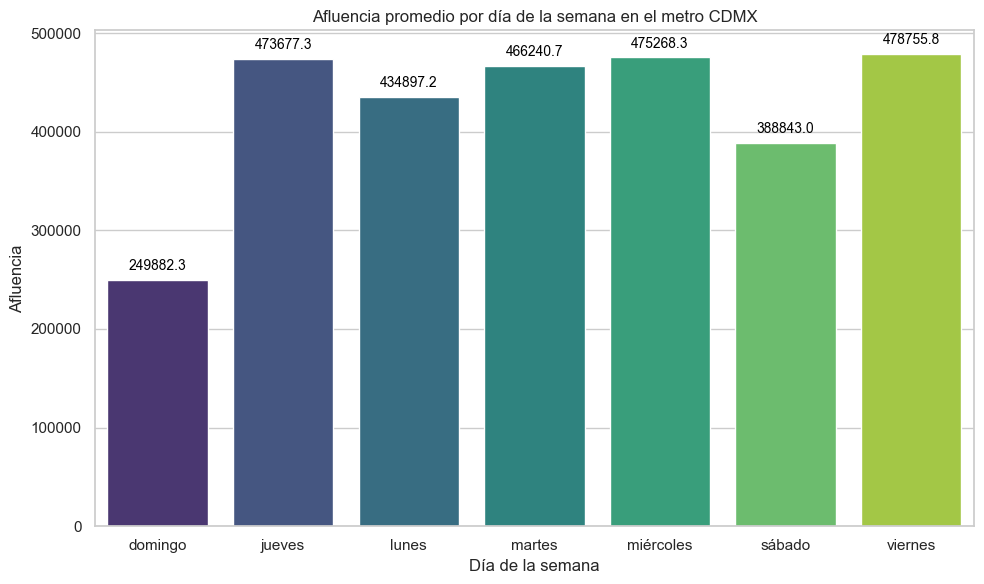

In [205]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="Dia_semana", y="afluencia", data=semanal_prom, palette="viridis")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, color='black', xytext = (0, 5),
                textcoords = 'offset points')

plt.xlabel('Día de la semana')
plt.ylabel('Afluencia')
plt.title('Afluencia promedio por día de la semana en el metro CDMX')
plt.tight_layout()

plt.show()

,Dia_semana,estacion,fecha,afluencia
0,domingo,ACATITLA,2022-01-02,6300
1,domingo,ACATITLA,2022-01-03,0
2,domingo,ACATITLA,2022-01-04,0
3,domingo,ACATITLA,2022-01-05,0
4,domingo,ACATITLA,2022-01-06,0
...,...,...,...,...
894539,viernes,ZOCALO/TENOCHTITLAN,2024-02-19,0
894540,viernes,ZOCALO/TENOCHTITLAN,2024-02-20,0
894541,viernes,ZOCALO/TENOCHTITLAN,2024-02-21,0
894542,viernes,ZOCALO/TENOCHTITLAN,2024-02-22,0


In [273]:
#estaciones_sum=df[df["Año"]>2021].groupby(["estacion","linea","Dia_semana"]).agg({"afluencia":"sum"}).reset_index()
estaciones_sum=df.groupby(['Dia_semana',"estacion"]).resample('D')['afluencia'].sum().reset_index()

In [274]:
pivot_table = pd.pivot_table(estaciones_sum, values='afluencia', index='estacion', columns=["Dia_semana"],aggfunc=np.mean)
pivot_table=pivot_table[['lunes','martes','miércoles','jueves','viernes','sábado','domingo']]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8948\2395385121.py:1: FutureWarning:

The provided callable <function mean at 0x000002686592A5C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



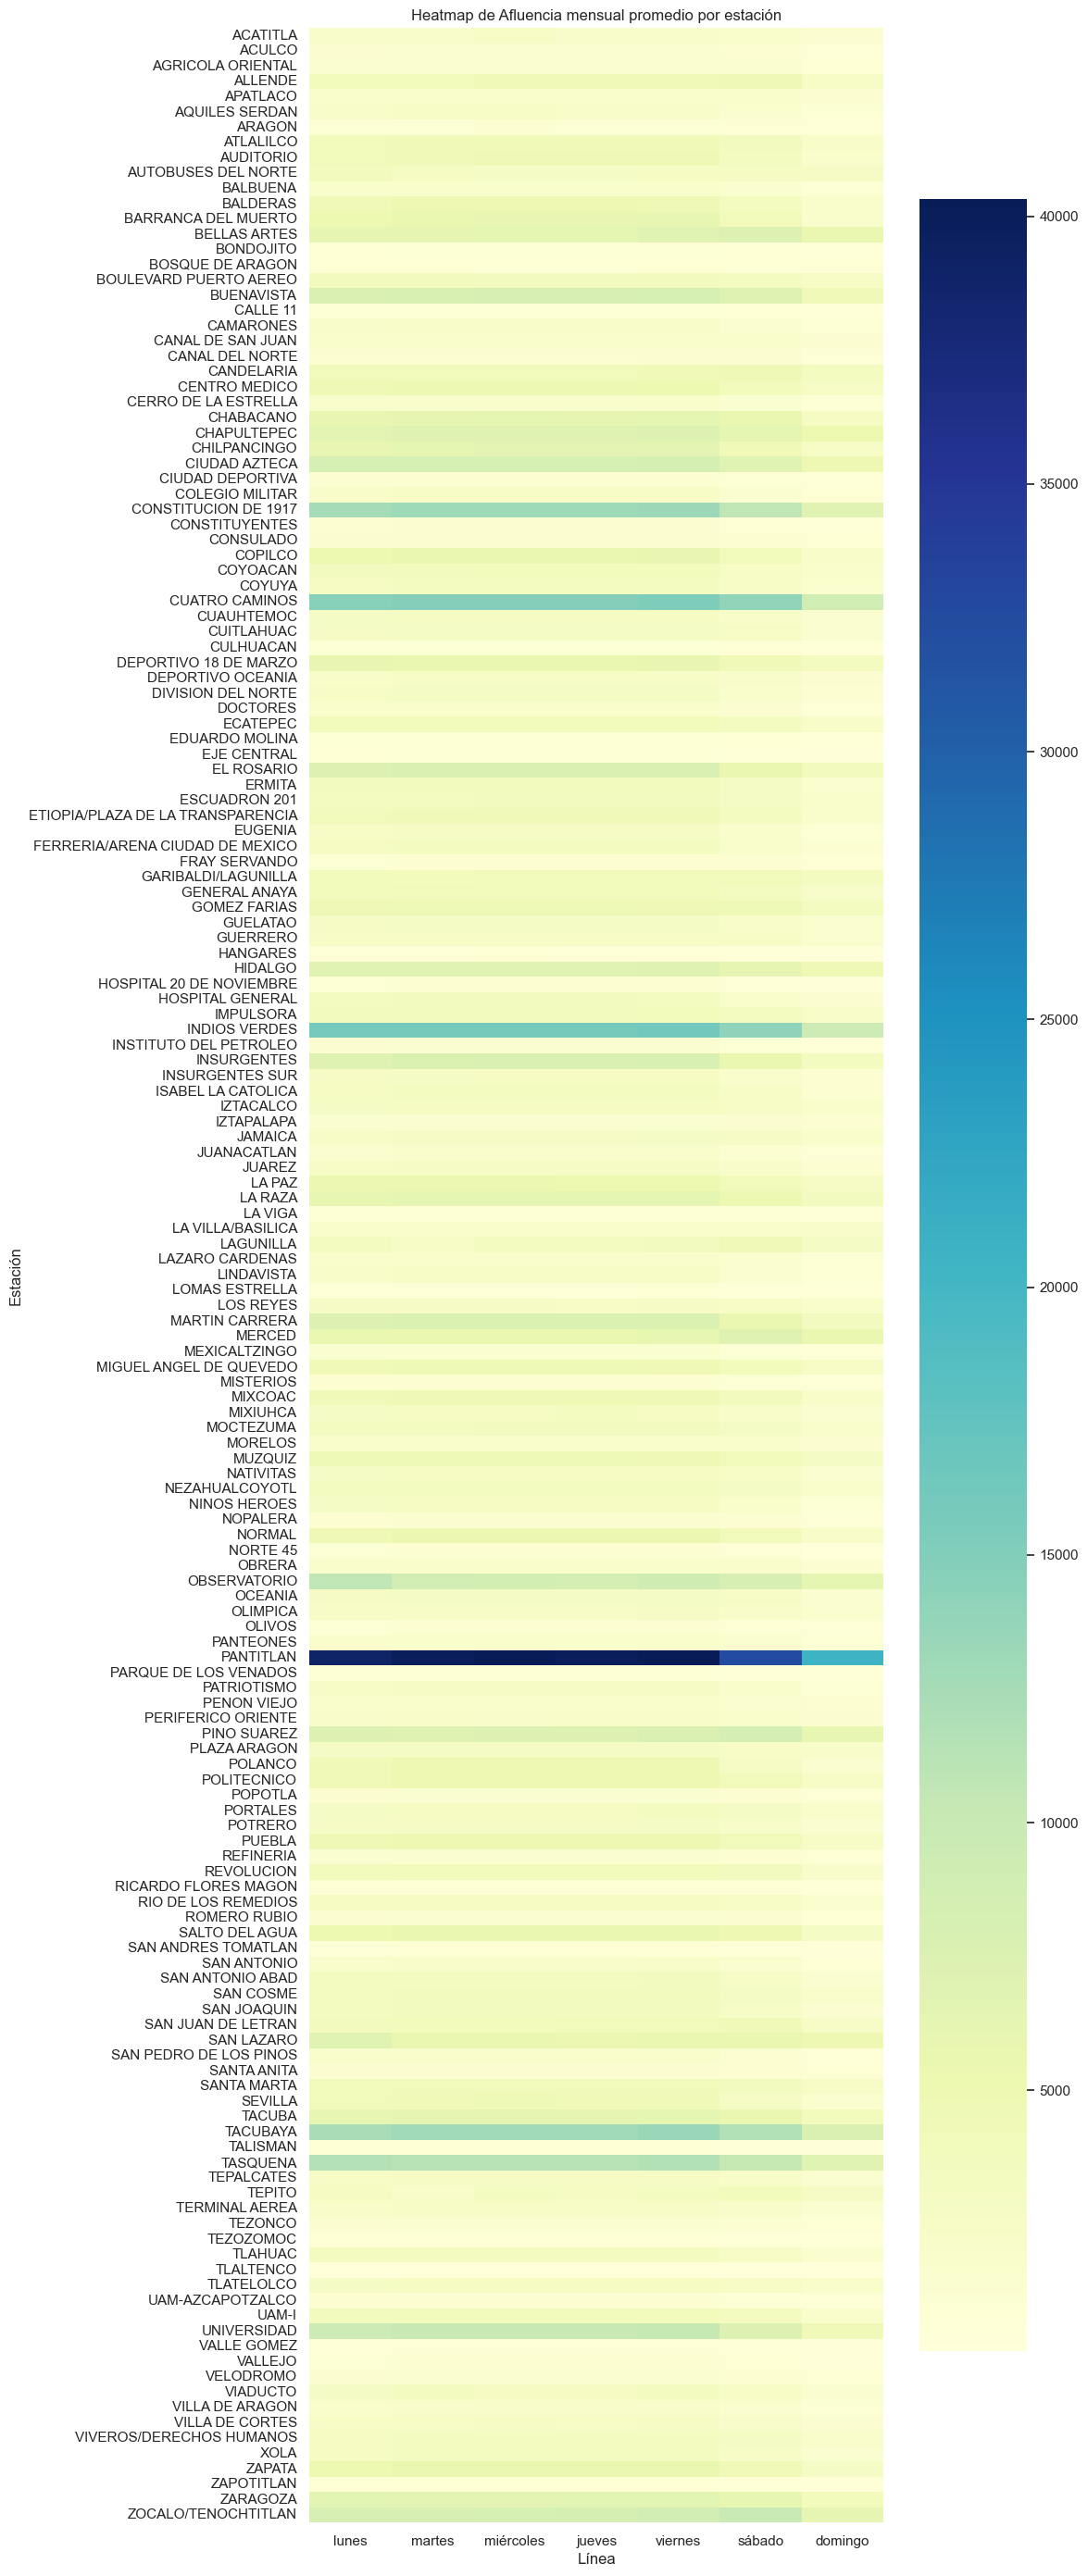

In [280]:
plt.figure(figsize=(10, 35))
heatmap = sns.heatmap(pivot_table, annot=False, cmap='YlGnBu')
plt.title("Heatmap de Afluencia mensual promedio por estación")
plt.xlabel('Línea')
plt.xticks()
plt.ylabel('Estación')
plt.show()